In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retail-analysis/all_data_copy.xlsx


In [4]:
pip install openpyxl

     |████████████████████████████████| 242 kB 889 kB/s            
Note: you may need to restart the kernel to use updated packages.


## Retail Analysis
Dataset Description:

    Instances: 3.73 Lakh
    Features: 6 columns
    Numerical: 4 columns
    Categorical: 2 columns

Attribute Information:


* Order ID: Order identification number for each product
* Product: Product name
* Quantity Ordered: Amount of items
* Price Each: Price of each product per item in dollars
* Order Date: Date of purchase
* Purchase Address: Address of purchase order


Retail Analysis
Dataset Description:
Instances: 3.73 Lakh
Features: 6 columns
Numerical: 4 columns
Categorical: 2 columns

Attribute Information:

Order ID: Order identification number for each product
Product: Product name
Quantity Ordered: Amount of items
Price Each: Price of each product per item in dollars
Order Date: Date of purchase
Purchase Address: Address of purchase order
Questions:

1. Load the dataset into pandas and provide a summary of columns in the loaded dataset without any modification.
2. Prepare the data frame for further analysis. Clean it, mould it in any manner you see fit.
3. Provide a summary of the cleaned dataset along with some preliminary analysis and contrast it with the uncleaned dataset wherever modifications are made.
4. Answer the following questions using the clean dataset by plotting suitable graphs:
    
    What is the distribution of sales among different cities in different months?
    
    Which City had the highest sales overall?
    
    Which Month had the highest amount of sales overall?
    
    Most bought products per city.
    
    
5. Based on your analysis, suggest a city for establishing a new branch for the retail store backed with proper reasoning.
6. Find out the distribution of sales over different times of the day (Morning, Afternoon, Evening, Night) and answer the following for each city:
7. What products are mostly sold at different times of the day?
8. Which time of day has the most sales?
9. Based on your analysis, suggest the best working hours and the best products for the retail stores in each city.
10. Find out the pair of products that are most sold together. 
    For example, generally, we would expect a person who buys an iPhone 11 to also buy the Apple Airpods together with it. Identify such pairs of products and suggest what promotional offers should the retail company come up with based on your outcome.

### Reading Excel File 

In [5]:
df=pd.read_excel('/kaggle/input/retail-analysis/all_data_copy.xlsx')

In [7]:
df.head() #first five 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234.0,iPhone,1.0,700.0,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


In [8]:
df.tail() #last five 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
373695,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
373696,259354.0,iPhone,1.0,700.0,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
373697,259355.0,iPhone,1.0,700.0,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
373698,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"
373699,259357.0,USB-C Charging Cable,1.0,11.95,2019-09-30 00:18:00,"250 Meadow St, San Francisco, CA 94016"


In [10]:
df.shape # verified with given detan as same number of row and column in data

(373700, 6)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373700 entries, 0 to 373699
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          372610 non-null  object
 1   Product           372610 non-null  object
 2   Quantity Ordered  372610 non-null  object
 3   Price Each        372610 non-null  object
 4   Order Date        372610 non-null  object
 5   Purchase Address  372610 non-null  object
dtypes: object(6)
memory usage: 17.1+ MB


only show object type of data need to retify futher.

In [13]:
df.isnull().sum()

Order ID            1090
Product             1090
Quantity Ordered    1090
Price Each          1090
Order Date          1090
Purchase Address    1090
dtype: int64

simmilar number of null, so we can drop it all togather.

In [17]:
duplicate = df[df.duplicated()]
  
print("Duplicate Rows :")
len(duplicate)

Duplicate Rows :


188012

In [19]:
duplicate = df[df.duplicated(keep = 'last')]
  
print("Duplicate Rows :")
  
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234.0,iPhone,1.0,700.0,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
373398,NaN,NaN,NaN,NaN,NaN,NaN
373413,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
373482,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
373631,259296.0,Apple Airpods Headphones,1.0,150.0,2019-09-28 16:48:00,"894 6th St, Dallas, TX 75001"


In [21]:
duplicate = df[df.duplicated(['Order ID'])]
  
print("Duplicate Rows based on Name and Age :")
  
# Print the resultant Dataframe
duplicate

Duplicate Rows based on Name and Age :


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
42,141275.0,Wired Headphones,1.0,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301"
58,141290.0,AA Batteries (4-pack),3.0,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001"
134,141365.0,Wired Headphones,1.0,11.99,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001"
154,141384.0,USB-C Charging Cable,1.0,11.95,2019-01-03 00:14:00,"223 Jackson St, Boston, MA 02215"
221,141450.0,Bose SoundSport Headphones,1.0,99.99,2019-01-12 11:16:00,"521 Park St, San Francisco, CA 94016"
...,...,...,...,...,...,...
373695,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
373696,259354.0,iPhone,1.0,700.0,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
373697,259355.0,iPhone,1.0,700.0,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
373698,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


In [126]:
sale=df.copy(deep=True)# making copy of dataframe

In [127]:
sale = sale.astype({"Product":'category',"Order ID":'category'})

In [128]:
sale['Price Each'] = pd.to_numeric(sale['Price Each'], errors='coerce')

In [129]:
sale['Quantity Ordered'] = pd.to_numeric(sale['Quantity Ordered'], errors='coerce')

In [130]:
sale['Order Date'] =  pd.to_datetime(sale['Order Date'],errors ='coerce')

In [131]:
sale.isnull().sum()

Order ID              0
Product               0
Quantity Ordered    710
Price Each          710
Order Date          710
Purchase Address      0
dtype: int64

In [132]:
sale.rename({'Order ID': 'id', 'Quantity Ordered': 'qty','Price Each': 'price', 'Order Date': 'date','Purchase Address': 'address'}, axis=1, inplace=True)

In [133]:
sale['dates'] = pd.to_datetime(sale['date']).dt.date
sale['time'] = pd.to_datetime(sale['date']).dt.time

In [134]:
sale = sale.drop(['date'],axis=1)

In [136]:
sale['dates'] =  pd.to_datetime(sale['dates'],errors ='coerce')

In [135]:
sale['time'] =  pd.to_datetime(sale['time'],errors ='coerce')

In [137]:
sale[['Street', 'City', 'State']] = sale['address'].str.split(',', expand=True)

In [142]:
sale.head()

,id,Product,qty,price,address,dates,time,Street,City,State
0,141234.0,iPhone,1.0,700.00,"944 Walnut St, Boston, MA 02215",2019-01-22,NaT,944 Walnut St,Boston,MA 02215
1,141235.0,Lightning Charging Cable,1.0,14.95,"185 Maple St, Portland, OR 97035",2019-01-28,NaT,185 Maple St,Portland,OR 97035
2,141236.0,Wired Headphones,2.0,11.99,"538 Adams St, San Francisco, CA 94016",2019-01-17,NaT,538 Adams St,San Francisco,CA 94016
3,141237.0,27in FHD Monitor,1.0,149.99,"738 10th St, Los Angeles, CA 90001",2019-01-05,NaT,738 10th St,Los Angeles,CA 90001
4,141238.0,Wired Headphones,1.0,11.99,"387 10th St, Austin, TX 73301",2019-01-25,NaT,387 10th St,Austin,TX 73301


In [139]:
sale1=sale.copy(deep=True)

In [151]:
sale1[['state','zip']]=sale1.State.str.extract('(?P<state>.+?) (?P<zip>.+?\S+)')

In [153]:
sale1 = sale1.drop(['State','address','time'],axis=1)

In [163]:
sale1.head()

,id,Product,qty,price,dates,Street,City,state,zip,month
0,141234.0,iPhone,1.0,700.00,2019-01-22,944 Walnut St,Boston,MA,02215,1.0
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28,185 Maple St,Portland,OR,97035,1.0
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17,538 Adams St,San Francisco,CA,94016,1.0
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05,738 10th St,Los Angeles,CA,90001,1.0
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25,387 10th St,Austin,TX,73301,1.0


In [164]:
sale1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372610 entries, 0 to 373699
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   id       372610 non-null  category      
 1   Product  372610 non-null  category      
 2   qty      371900 non-null  float64       
 3   price    371900 non-null  float64       
 4   dates    371900 non-null  datetime64[ns]
 5   Street   372610 non-null  object        
 6   City     371900 non-null  object        
 7   state    371900 non-null  object        
 8   zip      371900 non-null  object        
 9   month    371900 non-null  float64       
dtypes: category(2), datetime64[ns](1), float64(3), object(4)
memory usage: 32.8+ MB


In [162]:
sale1['month'] = sale1['dates'].dt.month

In [166]:
sale1['months'] = sale1['dates'].dt.to_period('M')

In [170]:
sale1 = sale1.drop(['months'],axis=1)

In [178]:
sale1 = sale1.drop(['month'],axis=1)

In [161]:
sale1.describe(include='all')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,id,Product,qty,price,dates,Street,City,state,zip
count,372610,372610,371900.000000,371900.000000,371900,372610,371900,371900,371900
unique,178438,20,NaN,NaN,366,46838,9,8,10
top,Order ID,USB-C Charging Cable,NaN,NaN,2019-12-17 00:00:00,Purchase Address,San Francisco,CA,94016
freq,710,43806,NaN,NaN,1762,710,89464,148674,89464
first,NaN,NaN,NaN,NaN,2019-01-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-01-01 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.124383,184.399735,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.442792,332.730883,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,2.990000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.000000,11.950000,NaN,NaN,NaN,NaN,NaN


What is the distribution of sales among different cities in different months?

In [176]:
sale1['yyyy'] = pd.to_datetime(sale1['dates']).dt.strftime('%Y')#final for separate month
sale1['mm'] = pd.to_datetime(sale1['dates']).dt.strftime('%m')

In [172]:
sale1['sales']=sale1['price']*sale1['qty']

In [179]:
sale1.head()

,id,Product,qty,price,dates,Street,City,state,zip,sales,yyyy,mm
0,141234.0,iPhone,1.0,700.00,2019-01-22,944 Walnut St,Boston,MA,02215,700.00,2019,01
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28,185 Maple St,Portland,OR,97035,14.95,2019,01
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17,538 Adams St,San Francisco,CA,94016,23.98,2019,01
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05,738 10th St,Los Angeles,CA,90001,149.99,2019,01
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25,387 10th St,Austin,TX,73301,11.99,2019,01


In [180]:
sale1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372610 entries, 0 to 373699
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   id       372610 non-null  category      
 1   Product  372610 non-null  category      
 2   qty      371900 non-null  float64       
 3   price    371900 non-null  float64       
 4   dates    371900 non-null  datetime64[ns]
 5   Street   372610 non-null  object        
 6   City     371900 non-null  object        
 7   state    371900 non-null  object        
 8   zip      371900 non-null  object        
 9   sales    371900 non-null  float64       
 10  yyyy     371900 non-null  object        
 11  mm       371900 non-null  object        
dtypes: category(2), datetime64[ns](1), float64(3), object(6)
memory usage: 38.4+ MB


In [181]:
sale1.City.value_counts()

 San Francisco    89464
 Los Angeles      59210
 New York City    49752
 Boston           39868
 Atlanta          29762
 Dallas           29640
 Seattle          29464
 Portland         24930
 Austin           19810
Name: City, dtype: int64

In [258]:
s_c_gp['Product'].count()

City
 Boston           39868
 Portland         24930
 San Francisco    89464
 Los Angeles      59210
 Austin           19810
 Atlanta          29762
 Seattle          29464
 New York City    49752
 Dallas           29640
Name: Product, dtype: int64

In [276]:
p_c_gp =sale1.groupby(['City','Product'],sort = False)

In [287]:
p1_c_gp =sale1.groupby(['Product','qty'],sort = False)

In [298]:
p1_c_gp['City'].sum()

Product  qty
iPhone   1.0     Boston Portland San Francisco New York City S...
         2.0     Portland Atlanta Los Angeles San Francisco Bo...
         3.0                                                    0
         4.0                                                    0
         5.0                                                    0
                                      ...                        
Product  5.0                                                    0
         6.0                                                    0
         7.0                                                    0
         8.0                                                    0
         9.0                                                    0
Name: City, Length: 180, dtype: object

In [280]:
x23=p_c_gp['qty'].max()

In [283]:
x23.head(50)

City      Product                   
 Atlanta  iPhone                        2.0
          Lightning Charging Cable      4.0
          Wired Headphones              4.0
          27in FHD Monitor              2.0
          AAA Batteries (4-pack)        7.0
          27in 4K Gaming Monitor        2.0
          USB-C Charging Cable          4.0
          Bose SoundSport Headphones    2.0
          Apple Airpods Headphones      2.0
          Macbook Pro Laptop            1.0
          Flatscreen TV                 2.0
          Vareebadd Phone               1.0
          AA Batteries (4-pack)         5.0
          Google Phone                  1.0
          20in Monitor                  2.0
          34in Ultrawide Monitor        2.0
          ThinkPad Laptop               1.0
          LG Dryer                      1.0
          LG Washing Machine            1.0
          Product                       NaN
 Austin   iPhone                        1.0
          Lightning Charging Cable     

In [253]:
m_c_gp =sale1.groupby(['mm'],sort = False)

In [247]:
s_c_gp =sale1.groupby(['City'],sort = False)

In [254]:
m_c_gp['sales'].sum().nlargest()

mm
12    9226886.68
10    7473453.76
04    6781340.48
11    6399206.40
05    6305213.50
Name: sales, dtype: float64

<AxesSubplot:ylabel='sales'>

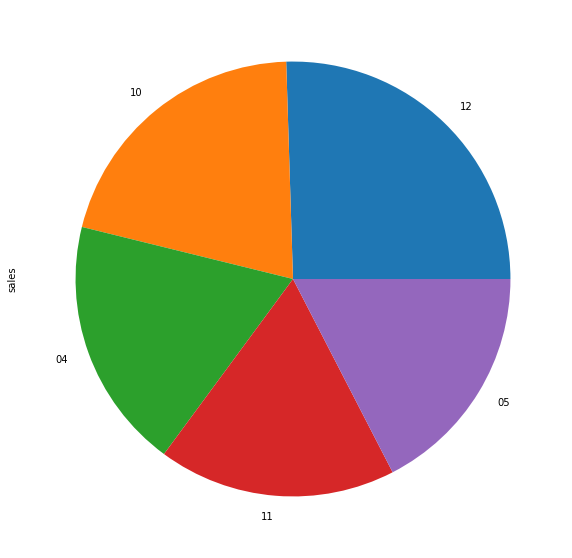

In [255]:
m_c_gp['sales'].sum().nlargest().plot(kind='pie')

In [252]:
s_c_gp['sales'].sum().nlargest()

City
 San Francisco    16524407.82
 Los Angeles      10905141.60
 New York City     9328634.86
 Boston            7323284.02
 Atlanta           5590997.16
Name: sales, dtype: float64

<AxesSubplot:ylabel='sales'>

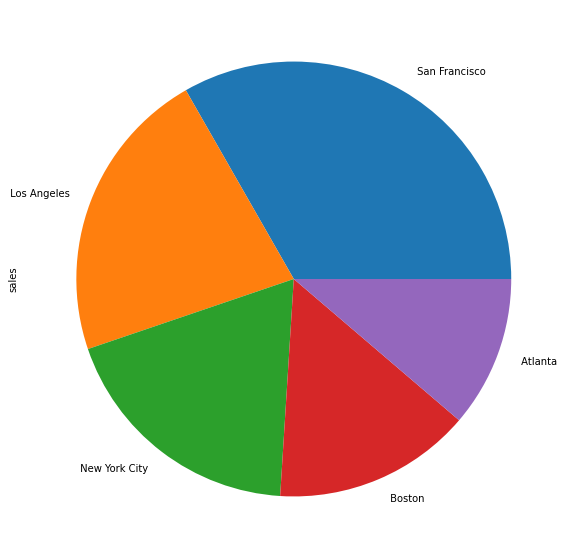

In [251]:
s_c_gp['sales'].sum().nlargest().plot(kind='pie')

,id,Product,qty,price,dates,Street,City,state,zip,sales,yyyy,mm
89139,226269.0,Google Phone,1.0,600.00,2019-07-19,947 Dogwood St,Seattle,WA,98101,600.00,2019,07
128782,264207.0,LG Washing Machine,1.0,600.00,2019-10-25,875 Pine St,Seattle,WA,98101,600.00,2019,10
128784,264209.0,AA Batteries (4-pack),2.0,3.84,2019-10-15,721 Wilson St,Seattle,WA,98101,7.68,2019,10
344619,262199.0,AA Batteries (4-pack),1.0,3.84,2019-10-14,608 Johnson St,Seattle,WA,98101,3.84,2019,10
319317,205485.0,Lightning Charging Cable,1.0,14.95,2019-05-12,346 2nd St,Seattle,WA,98101,14.95,2019,05
...,...,...,...,...,...,...,...,...,...,...,...,...
176692,309951.0,Apple Airpods Headphones,3.0,150.00,2019-12-31,446 Walnut St,Boston,MA,02215,450.00,2019,12
232203,309951.0,Apple Airpods Headphones,3.0,150.00,2019-12-31,446 Walnut St,Boston,MA,02215,450.00,2019,12
1073,Order ID,Product,NaN,NaN,NaT,Purchase Address,None,NaN,NaN,NaN,NaN,NaN
1102,Order ID,Product,NaN,NaN,NaT,Purchase Address,None,NaN,NaN,NaN,NaN,NaN


In [223]:
x

City      mm
 Atlanta  01    298319.08
          02    352940.60
          03    463810.76
          04    568897.82
          05    477707.98
                  ...    
 Seattle  08    379430.18
          09    312738.54
          10    633712.52
          11    504160.26
          12    774635.86
Name: sales, Length: 108, dtype: float64

In [ ]:
sale,month,city

In [199]:
import seaborn as sns

<AxesSubplot:xlabel='City,mm'>

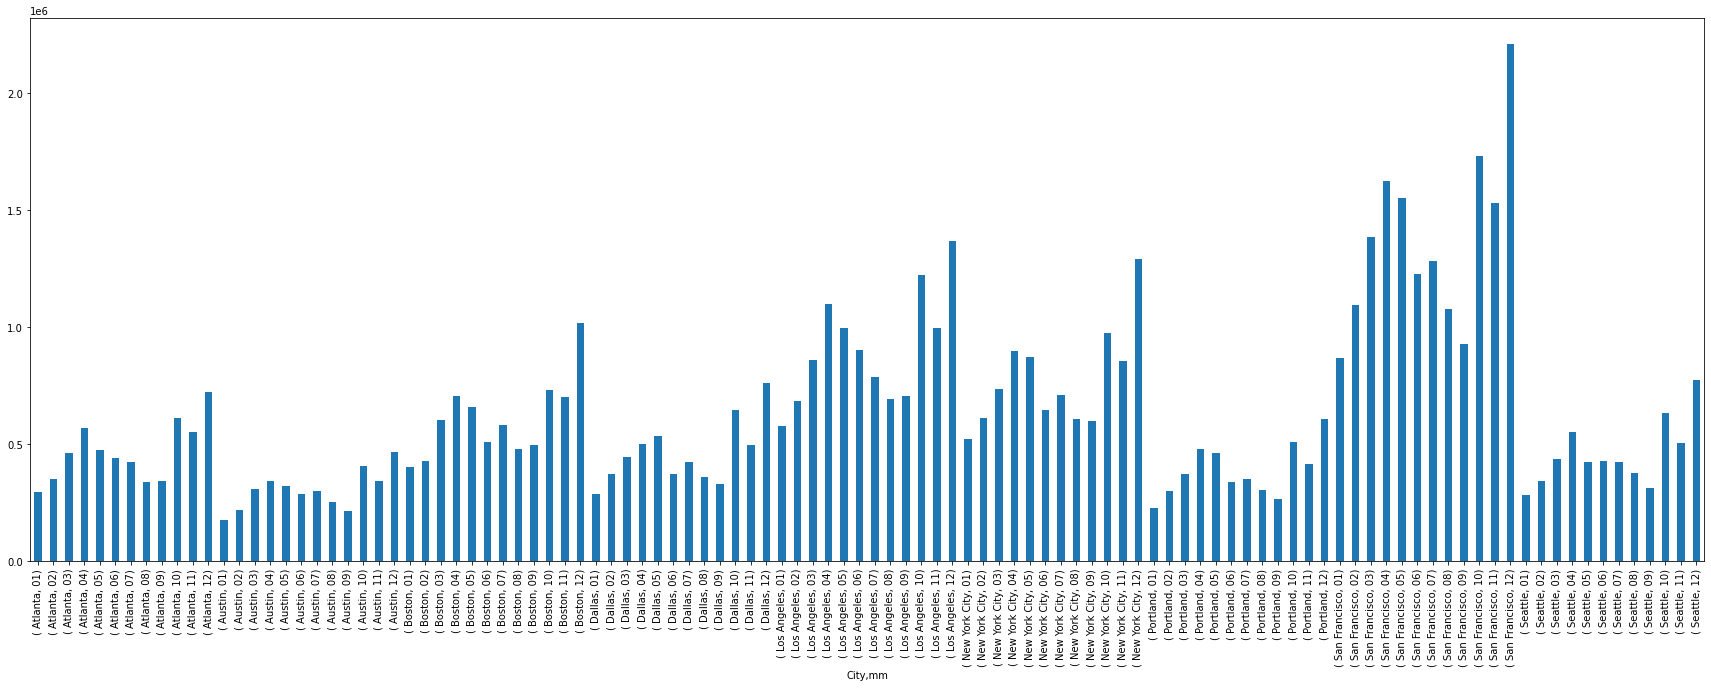

In [228]:
x.plot(kind='bar',figsize=(30, 10))

In [235]:
%pylab inline
import matplotlib as mpl

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['figsize']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


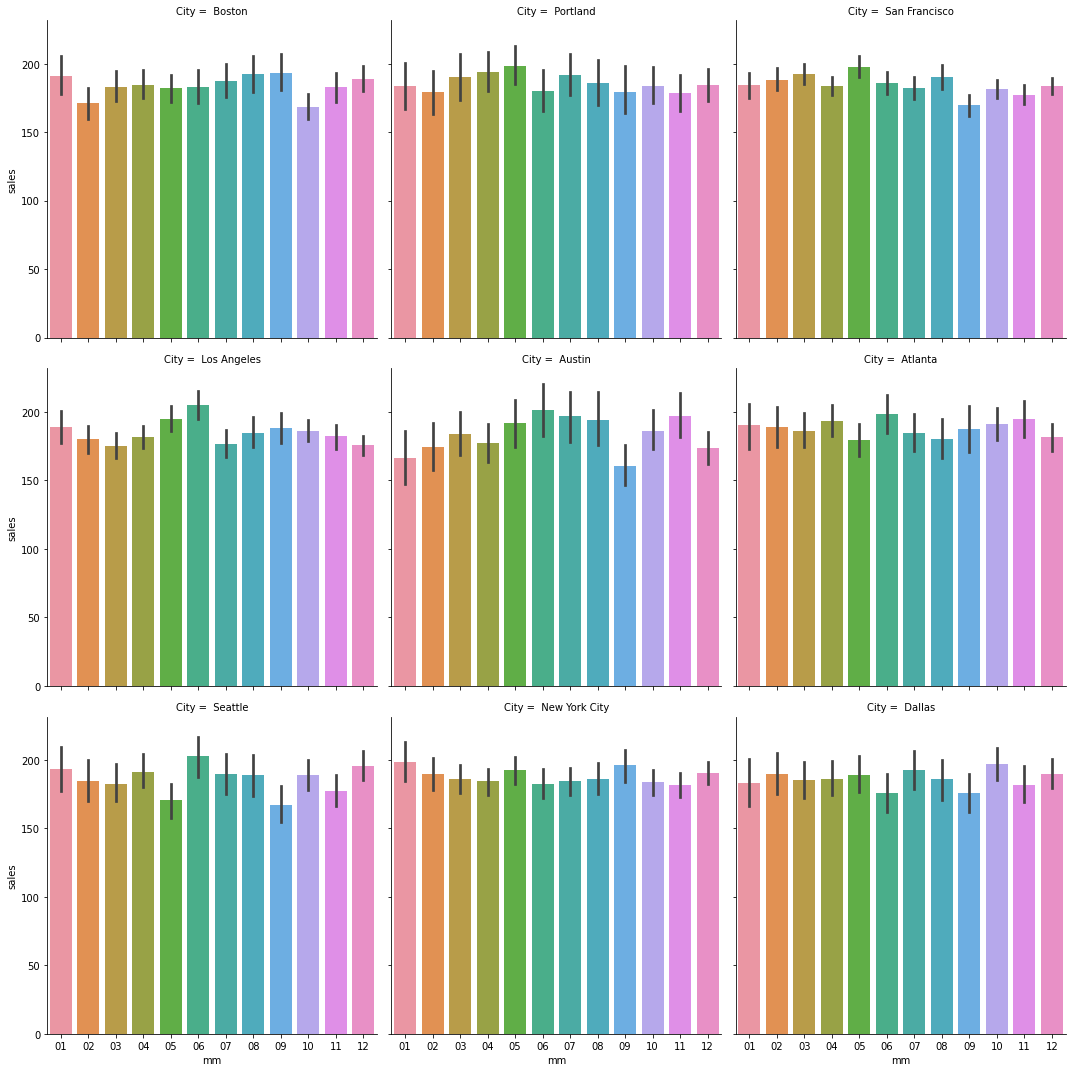

In [239]:
mpl.rc("figure", figsize=(45, 10))
sns.catplot(y='sales', x='mm', col='City',col_wrap=3 ,data=sale1, kind='bar')